In [350]:
import re

import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.svm import SVC
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, ensemble
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, learning_curve
from statistics import mean


### **Data Preprocessing**

In [1]:
# read the dataset file
df = pd.read_csv('./ckd-dataset-v2.csv')

# check the top 5 rows of dataframe
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [2]:
# as we can see row 0 and 1 contain garbadge values so we can delete these two rows
df.drop([0,1],axis=0,inplace=True)

# reset the index after droping row 1 and 2
df = df.reset_index(drop=True)

# again check the top 5 extries 
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [3]:
pd.set_option('display.max_columns', None)
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,41.3 - 45.2,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,37.4 - 41.3,5.05 - 5.64,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [4]:
dataForHeatmap = df.loc[:, ['bp (Diastolic)', 'bp limit', 'rbc', 'pc', 'pcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'affected']]
dataForHeatmap.dtypes

bp (Diastolic)    object
bp limit          object
rbc               object
pc                object
pcc               object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
affected          object
dtype: object

In [5]:
for column in dataForHeatmap:
    dataForHeatmap[column] = pd.to_numeric(dataForHeatmap[column])
dataForHeatmap.dtypes

bp (Diastolic)    int64
bp limit          int64
rbc               int64
pc                int64
pcc               int64
htn               int64
dm                int64
cad               int64
appet             int64
pe                int64
ane               int64
affected          int64
dtype: object

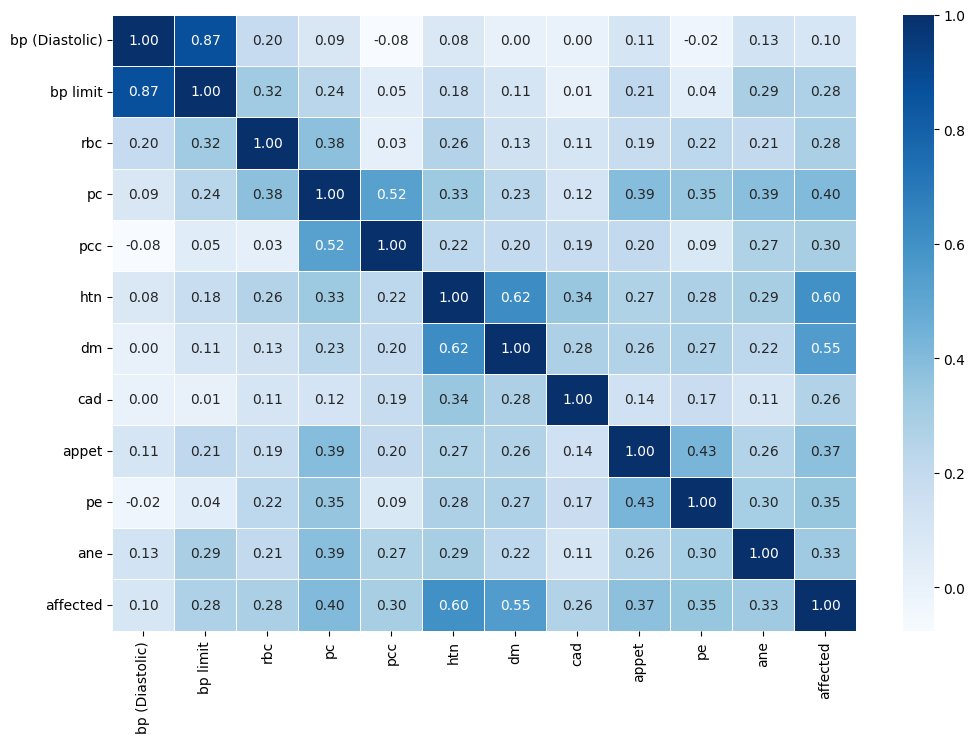

In [6]:
# Corellation
cor_metricx=dataForHeatmap.corr()
fig, axis=plt.subplots(figsize=(12,8))
axis=sns.heatmap(cor_metricx, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues") # annot-->numbers inside boxs

In [353]:
# convert the categories of target ("ckd", "notckd") to (1, 0) 
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

1    128
0     72
Name: class, dtype: int64


<AxesSubplot: >

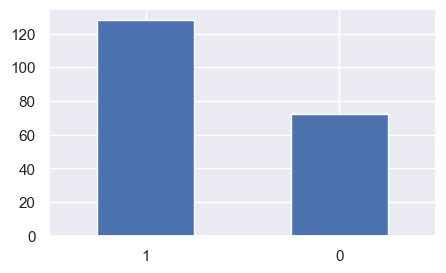

In [354]:
# Check for class imballance problem
print(df['class'].value_counts())

figure(figsize=(5, 3), dpi=100)
df['class'].value_counts().plot.bar(rot=0)

In [355]:
df['stage'] = df['stage'].map({'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5})

In [356]:
#Removed all unnecessary whitespaces 
#Found average of values given in range
#Addded 1 after removing '>', Subtracted 1 after removing '<' and kept the first value when values are given in range like "3-6" and the original value when there was '≥' 



regexp = re.compile(r'≥|≤')

df = df.applymap(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)
df = df.applymap(lambda x: (float(str(x).split('-')[0])+float(str(x).split('-')[1]))/2 if '-' in str(x) else x) 
df = df.applymap(lambda x: float(x[1:])-1 if '<' in str(x) else (str(x).replace('≥','').replace('≤','') if regexp.search(str(x)) else(float(x[1:])+1 if '>' in str(x) else x )))


df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.02,1.0,1,0,-1.0,0,0,0,...,0,0,0,0,0,0,227.944,1,1,11.0
1,0,0,1.01,-1.0,1,0,-1.0,0,0,0,...,0,0,0,0,0,0,227.944,1,1,11.0
2,0,0,1.01,4,1,1,-1.0,1,0,1,...,0,0,0,1,0,0,139.8635,1,1,11.0
3,1,1,1.01,3.0,1,0,-1.0,0,0,0,...,0,0,0,0,0,0,139.8635,1,1,11.0
4,0,0,1.016,-1.0,1,0,-1.0,0,0,0,...,0,1,0,1,1,0,139.8635,1,1,16.0


In [357]:
# fix the string present in column: grf row: 179 (temporary fix)
df['grf'].loc[179] = 200

df['grf'].loc[179]



C:\Users\dell\AppData\Local\Temp\ipykernel_1688\3413097759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grf'].loc[179] = 200


200

In [358]:
# convert dtype of every column from object to numeric(int/float)
for column in df:
    df[column] = pd.to_numeric(df[column])

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  200 non-null    int64  
 1   bp limit        200 non-null    int64  
 2   sg              200 non-null    float64
 3   al              200 non-null    float64
 4   class           200 non-null    int64  
 5   rbc             200 non-null    int64  
 6   su              200 non-null    float64
 7   pc              200 non-null    int64  
 8   pcc             200 non-null    int64  
 9   ba              200 non-null    int64  
 10  bgr             200 non-null    float64
 11  bu              200 non-null    float64
 12  sod             200 non-null    float64
 13  sc              200 non-null    float64
 14  pot             200 non-null    float64
 15  hemo            200 non-null    float64
 16  pcv             200 non-null    float64
 17  rbcc            200 non-null    flo

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.540000,0.755000,1.002450,0.400000,0.640000,0.125000,-0.435000,0.22500,0.135000,0.055000,...,0.390000,0.350000,0.110000,0.200000,0.175000,0.160000,70.618293,2.860000,0.640000,53.185000
std,0.499648,0.805119,0.123238,1.776451,0.481205,0.331549,1.402895,0.41863,0.342581,0.228552,...,0.488974,0.478167,0.313675,0.401004,0.380921,0.367526,54.357006,1.473518,0.481205,15.878251
min,0.000000,0.000000,0.007000,-1.000000,0.000000,0.000000,-1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.617500,1.000000,0.000000,11.000000
25%,0.000000,0.000000,1.016000,-1.000000,0.000000,0.000000,-1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.617500,1.000000,0.000000,47.000000
50%,1.000000,1.000000,1.020000,-1.000000,1.000000,0.000000,-1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.200350,3.000000,1.000000,55.000000
75%,1.000000,1.000000,1.020000,2.000000,1.000000,0.000000,-1.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,89.532000,4.000000,1.000000,62.500000
max,1.000000,2.000000,1.023000,4.000000,1.000000,1.000000,4.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,227.944000,5.000000,1.000000,74.000000


In [359]:
# seperate features and target variables 
#import numpy as np
#X = np.asarray(df.drop(['class'], axis=1))
#y = np.asarray(df['class'])

X = df.drop(['class'], axis=1)
y = df['class']

In [360]:
# split dataset into train/test (150 trainining and 50 testing samples)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [361]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [362]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.25, random_state=42, shuffle=True
)

In [363]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=20)

# Train the model using the training sets
classifier.fit(X_train, y_train)



RandomForestClassifier(n_estimators=20)

In [364]:
# predictin on the test set
y_pred = classifier.predict(X_test)

train_predict = classifier.predict(X_train)



Accurancy Score

In [365]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy of train_set:", accuracy_score(y_train, train_predict))

Accuracy: 1.0
Accuracy of train_set: 1.0


In [366]:
#Cross-Validation
#clf = classifier.fit(X_train, y_train)
#scores = -1 * cross_val_score(clf, X, y, scoring='neg_mean_absolute_error', cv=5)

#print(scores)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(classifier, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.975 1.    1.    1.    1.   ]
Average CV Score:  0.9949999999999999


Fit Score

In [367]:
models={"SVC" : SVC()}

def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(2)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train,)
        model_score[name]=model.score(X_test, y_test)
    return model_score


scores = fit_score(models, X_train, X_test, y_train, y_test)
scores


{'SVC': 1.0}

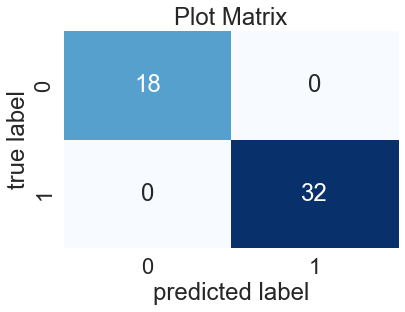

In [368]:
# make predictions on test dataset using trained model
y_pred = classifier.predict(X_test)

# confussion matrix to see where our model get confuse
confusion_matrix(y_test, y_pred)


sns.set(font_scale=2)

def plot_matrix(cm, classes, title):
  ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=classes, yticklabels=classes, cbar=False)
  ax.set(title=title, xlabel="predicted label", ylabel="true label")

cm = np.array([[18,  0],[ 0, 32]])
classes = [0, 1]
title = "Plot Matrix"

plot_matrix(cm, classes, title)



Classification Report
- precision
- recall
-  f1-score
-  support

In [369]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        32

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Log Loss/Binary Crossentropy

In [370]:
log = log_loss(y_test, y_pred)
print('Log Loss: %.3f' % log)

Log Loss: 0.000


AUC Score

In [371]:
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC_AUC: %.3f' % roc_auc)

ROC_AUC: 1.000


Checking Important features

In [372]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
26,affected,0.304438
15,pcv,0.209348
14,hemo,0.142094
25,stage,0.072694
16,rbcc,0.071012
19,dm,0.042710
3,al,0.039612
2,sg,0.021587
24,grf,0.021285
18,htn,0.020577


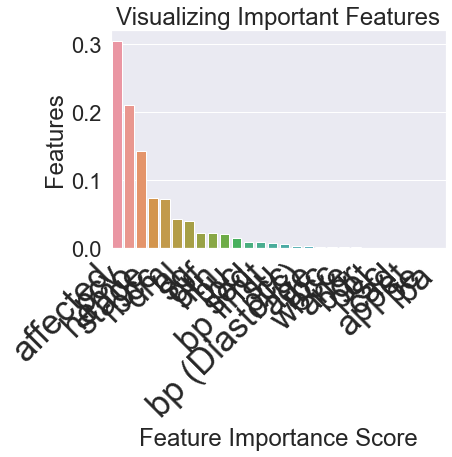

In [373]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

Classficiation report

In [374]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        32

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Accuracy graph 

C:\Users\dell\AppData\Local\Temp\ipykernel_1688\2957469488.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


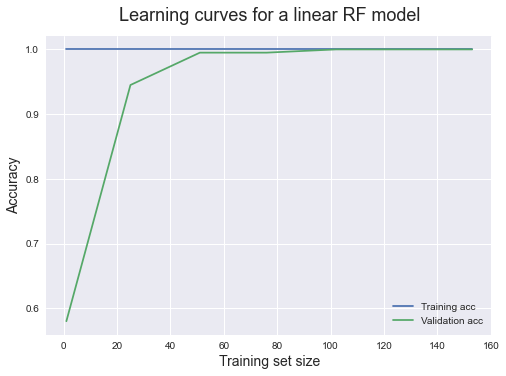

In [381]:
train_sizes = [1,25,51,76,102,127,153]
train_sizes,train_scores, validation_scores = learning_curve(estimator = ensemble.RandomForestClassifier(),
                                                          X = X,
                                                          y = y, 
                                                          train_sizes = train_sizes, 
                                                          cv = 5,
                                                          scoring = 'accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training acc')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation acc')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear RF model', fontsize = 18, y = 1.03)
plt.legend()